# BLOOD DONATION REGISTRY

# DATASET : KAGGLE

https://www.kaggle.com/datasets/tarekmasryo/blood-donor-registry-dataset


* ROWS: 30000
* COLUMNS: 27

# 🩸 PROBLEM STATEMENT

The main goal of this dataset is to predict whether a person is eligible to donate blood or not  next 6 month based on their 
* personal details, health information, and past donation history
> This helps blood banks identify safe donors, reduce rejection during donation, and ensure a steady supply of healthy blood.

### Problem Type
**Binary Classification Problem**  
- Target variable `donated_next_6m`.
### ✨ Prediction Categories

The target column have 2 value:
 0 and 1 

### Real-World Use Case
This dataset helps blood banks predict donor eligibility and future donations so they can contact the right donors at the right time and maintain a reliable blood supply


## 📋 Feature Explanation

- **donor_id** – Unique ID given to each donor  
- **age** – Age of the donor  
- **sex** – Gender of the donor  
- **country_code** – Country where the donor is registered  
- **region** – Area or region of the donor  
- **blood_type** – Blood group of the donor (A, B, AB, O, etc.)  
- **is_rare_type** – Indicates if the blood type is rare (Yes/No)  
- **smoker** – Whether the donor smokes or not  
- **bmi** – Body Mass Index, shows body weight health  
- **chronic_condition_flag** – Shows if the donor has long-term diseases  
- **eligible_to_donate** – Whether the donor is eligible to donate (Target: 0/1)  
- **deferral_reason** – Reason why donation was postponed or rejected  
- **preferred_site** – Preferred donation center or location  
- **donation_count_last_12m** – Number of donations in the last 12 months  
- **is_regular_donor** – Indicates if the donor donates regularly  
- **years_since_first_donation** – Years passed since first donation  
- **lifetime_donation_count** – Total donations made by the donor  
- **first_donation_year** – Year when the donor donated first  
- **last_donation_date** – Date of the most recent donation  
- **recency_days** – Days since the last donation  
- **donor_age_at_first_donation** – Age when the donor donated for the first time  
- **blood_type_country_prevalence** – How common the blood type is in the country  
- **donation_propensity_score** – Score showing likelihood of donating  
- **eligibility_status** – Donor status (eligible, temporary deferral, permanent deferral)  
- **as_of_date** – Date when the record was last updated  
- **donated_next_6m** – Whether the donor donated in the next 6 months  
- **next_6m_donation_count** – Number of donations in the next 6 months


> `donation_propensity_score` is an engineered signal; exclude it if you want a “feature-only” baseline

# Import Libaries

In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder

df=pd.read_csv(r"C:\Users\Pc\OneDrive\Desktop\ml project copy\blood_donation_registry_ml_ready (4).csv")
df

,donor_id,age,sex,country_code,region,blood_type,is_rare_type,smoker,bmi,chronic_condition_flag,...,first_donation_year,last_donation_date,recency_days,donor_age_at_first_donation,blood_type_country_prevalence,donation_propensity_score,eligibility_status,as_of_date,donated_next_6m,next_6m_donation_count
0,1,55,F,MX,Americas,A+,0,1,27.2,0,...,2023,2023-04-05,636,54,0.232140,19.4,eligible,2024-12-31,0,0
1,2,47,F,CN,Asia,B+,0,0,16.0,1,...,2013,2022-04-18,988,36,0.214937,2.8,permanent_deferral,2024-12-31,0,0
2,3,49,F,UG,Africa,O+,0,0,21.8,0,...,2014,2021-07-26,1254,39,0.461575,27.5,eligible,2024-12-31,1,1
3,4,45,F,JP,Asia,O+,0,1,29.0,0,...,2018,2024-01-17,349,39,0.386886,36.1,eligible,2024-12-31,0,0
4,5,52,F,TR,MENA,A+,0,1,25.0,1,...,2017,2021-08-15,1234,45,0.260613,2.8,permanent_deferral,2024-12-31,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,44,F,MA,MENA,A-,1,0,22.8,0,...,2019,2022-07-09,906,39,0.030138,25.8,eligible,2024-12-31,0,0
29996,29997,31,M,ES,Europe,A+,0,0,24.8,0,...,2019,2024-11-29,32,26,0.312493,46.6,eligible,2024-12-31,1,1
29997,29998,66,F,KE,Africa,B+,0,1,28.1,0,...,2014,2018-12-01,2222,56,0.181184,6.0,permanent_deferral,2024-12-31,0,0
29998,29999,39,F,IN,Asia,O+,0,0,24.1,0,...,2022,2023-10-23,435,37,0.401338,47.4,eligible,2024-12-31,1,1


# Basic Understanding

In [2]:
print("shape of the dataset:",df.shape)

shape of the dataset: (30000, 27)


In [3]:
# It shows first 5 rows from the dataset using head()

df.head()  

,donor_id,age,sex,country_code,region,blood_type,is_rare_type,smoker,bmi,chronic_condition_flag,...,first_donation_year,last_donation_date,recency_days,donor_age_at_first_donation,blood_type_country_prevalence,donation_propensity_score,eligibility_status,as_of_date,donated_next_6m,next_6m_donation_count
0,1,55,F,MX,Americas,A+,0,1,27.2,0,...,2023,2023-04-05,636,54,0.232140,19.4,eligible,2024-12-31,0,0
1,2,47,F,CN,Asia,B+,0,0,16.0,1,...,2013,2022-04-18,988,36,0.214937,2.8,permanent_deferral,2024-12-31,0,0
2,3,49,F,UG,Africa,O+,0,0,21.8,0,...,2014,2021-07-26,1254,39,0.461575,27.5,eligible,2024-12-31,1,1
3,4,45,F,JP,Asia,O+,0,1,29.0,0,...,2018,2024-01-17,349,39,0.386886,36.1,eligible,2024-12-31,0,0
4,5,52,F,TR,MENA,A+,0,1,25.0,1,...,2017,2021-08-15,1234,45,0.260613,2.8,permanent_deferral,2024-12-31,0,0


In [4]:
# It show last 5 rows from the dataset using tail()

df.tail()

,donor_id,age,sex,country_code,region,blood_type,is_rare_type,smoker,bmi,chronic_condition_flag,...,first_donation_year,last_donation_date,recency_days,donor_age_at_first_donation,blood_type_country_prevalence,donation_propensity_score,eligibility_status,as_of_date,donated_next_6m,next_6m_donation_count
29995,29996,44,F,MA,MENA,A-,1,0,22.8,0,...,2019,2022-07-09,906,39,0.030138,25.8,eligible,2024-12-31,0,0
29996,29997,31,M,ES,Europe,A+,0,0,24.8,0,...,2019,2024-11-29,32,26,0.312493,46.6,eligible,2024-12-31,1,1
29997,29998,66,F,KE,Africa,B+,0,1,28.1,0,...,2014,2018-12-01,2222,56,0.181184,6.0,permanent_deferral,2024-12-31,0,0
29998,29999,39,F,IN,Asia,O+,0,0,24.1,0,...,2022,2023-10-23,435,37,0.401338,47.4,eligible,2024-12-31,1,1
29999,30000,46,M,UG,Africa,O+,0,0,28.0,0,...,1998,2024-05-16,229,20,0.461575,70.2,eligible,2024-12-31,1,2


In [5]:
# It show randomly one rows from the dataset so use sample()

df.sample()

,donor_id,age,sex,country_code,region,blood_type,is_rare_type,smoker,bmi,chronic_condition_flag,...,first_donation_year,last_donation_date,recency_days,donor_age_at_first_donation,blood_type_country_prevalence,donation_propensity_score,eligibility_status,as_of_date,donated_next_6m,next_6m_donation_count
19188,19189,41,F,KE,Africa,B+,0,0,21.4,0,...,2009,2024-04-15,260,26,0.181184,61.7,eligible,2024-12-31,1,3


In [6]:
# It show the numerical columns and its values

df.describe()

,donor_id,age,is_rare_type,smoker,bmi,chronic_condition_flag,eligible_to_donate,donation_count_last_12m,is_regular_donor,years_since_first_donation,lifetime_donation_count,first_donation_year,recency_days,donor_age_at_first_donation,blood_type_country_prevalence,donation_propensity_score,donated_next_6m,next_6m_donation_count
count,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,45.13510,0.071967,0.240767,25.971250,0.135300,0.830500,0.765267,0.189500,8.249100,10.091033,2015.750900,1008.677000,36.886000,0.286317,33.795320,0.371133,0.537900
std,8660.398374,10.83432,0.258437,0.427556,3.983766,0.342049,0.375199,1.204609,0.391912,6.352128,17.313228,6.352128,1141.658289,10.478902,0.140478,20.880561,0.483116,0.820926
min,1.000000,18.00000,0.000000,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1989.000000,1.000000,18.000000,0.002220,0.000000,0.000000,0.000000
25%,7500.750000,37.00000,0.000000,0.000000,23.300000,0.000000,1.000000,0.000000,0.000000,3.000000,1.000000,2012.000000,232.000000,29.000000,0.192480,21.300000,0.000000,0.000000
50%,15000.500000,45.00000,0.000000,0.000000,26.000000,0.000000,1.000000,0.000000,0.000000,7.000000,3.000000,2017.000000,554.000000,36.000000,0.287097,32.800000,0.000000,0.000000
75%,22500.250000,53.00000,0.000000,0.000000,28.700000,0.000000,1.000000,1.000000,0.000000,12.000000,8.000000,2021.000000,1394.000000,44.000000,0.400264,47.600000,1.000000,1.000000
max,30000.000000,69.00000,1.000000,1.000000,42.000000,1.000000,1.000000,5.000000,1.000000,35.000000,140.000000,2024.000000,6552.000000,68.000000,0.507883,89.200000,1.000000,3.000000


In [7]:
# It show the categorical columns in the dataset

df.describe(include="object")

,sex,country_code,region,blood_type,deferral_reason,preferred_site,last_donation_date,eligibility_status,as_of_date
count,30000,30000,30000,30000,5085,30000,30000,30000,30000
unique,2,39,5,8,3,3,4411,3,1
top,M,KE,MENA,O+,chronic_condition,hospital,2024-01-17,eligible,2024-12-31
freq,15554,1354,7432,12649,4059,17822,53,24915,30000


In [8]:
# It give the full informations from the all the columns and its shows  the non-null count,datatype,rows and columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   donor_id                       30000 non-null  int64  
 1   age                            30000 non-null  int64  
 2   sex                            30000 non-null  object 
 3   country_code                   30000 non-null  object 
 4   region                         30000 non-null  object 
 5   blood_type                     30000 non-null  object 
 6   is_rare_type                   30000 non-null  int64  
 7   smoker                         30000 non-null  int64  
 8   bmi                            30000 non-null  float64
 9   chronic_condition_flag         30000 non-null  int64  
 10  eligible_to_donate             30000 non-null  int64  
 11  deferral_reason                5085 non-null   object 
 12  preferred_site                 30000 non-null 

* Dataset has 30,000 rows and 27 columns
* Mix of numeric and categorical features
* Very few missing values (except deferral_reason)

In [9]:
year=df[['years_since_first_donation', 'first_donation_year']].corr()
df[['first_donation_year', 'donor_age_at_first_donation']].corr()
print(year)
df.drop(columns="years_since_first_donation",inplace=True)  

# The column was dropped because a correlation of −1 or +1 shows a perfect relationship, meaning it provides duplicate information.

                            years_since_first_donation  first_donation_year
years_since_first_donation                         1.0                 -1.0
first_donation_year                               -1.0                  1.0


In [10]:
def display_cols_value_counts(cols):
    for col in cols:
        print("-"*30, f"\ncolumn: {col}\n", "-"*30)

        c = df[col]   # shortest clean name

        print("Datatype:", c.dtype)
        print("Null values:", c.isnull().sum())
        print(c.describe(), "\n")

        if c.nunique() < 10:
            print("Unique values:", c.unique())
            print("Frequency table:\n", c.value_counts())
        else:
            print(f"Frequency table not displayed ({c.nunique()} unique values)\n")

# Run
display_cols_value_counts(df.columns)

# drop the not related columns
df.drop(columns="country_code",inplace=True)
df.drop(columns="last_donation_date",inplace=True)
df.drop(columns="as_of_date",inplace=True)
df.drop(columns="donor_id",inplace=True)

# These columns were dropped because they are  constant features that do not help in prediction.

------------------------------ 
column: donor_id
 ------------------------------
Datatype: int64
Null values: 0
count    30000.000000
mean     15000.500000
std       8660.398374
min          1.000000
25%       7500.750000
50%      15000.500000
75%      22500.250000
max      30000.000000
Name: donor_id, dtype: float64 

Frequency table not displayed (30000 unique values)

------------------------------ 
column: age
 ------------------------------
Datatype: int64
Null values: 0
count    30000.00000
mean        45.13510
std         10.83432
min         18.00000
25%         37.00000
50%         45.00000
75%         53.00000
max         69.00000
Name: age, dtype: float64 

Frequency table not displayed (52 unique values)

------------------------------ 
column: sex
 ------------------------------
Datatype: object
Null values: 0
count     30000
unique        2
top           M
freq      15554
Name: sex, dtype: object 

Unique values: ['F' 'M']
Frequency table:
 sex
M    15554
F    14446
Name:

#  visualization

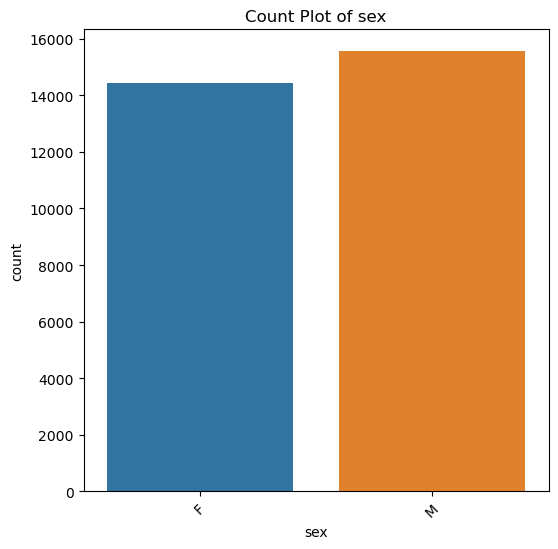

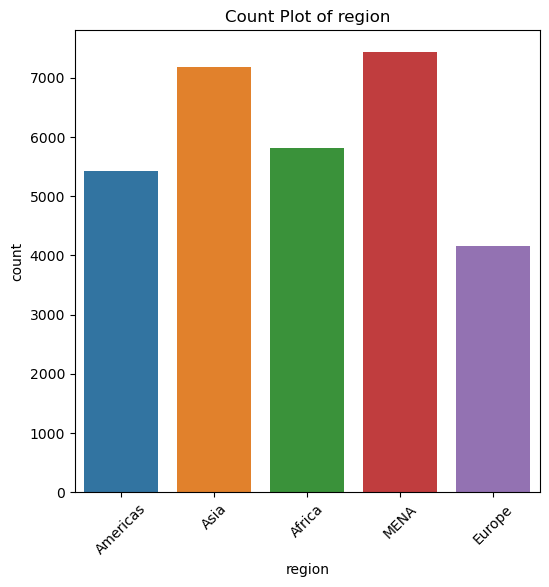

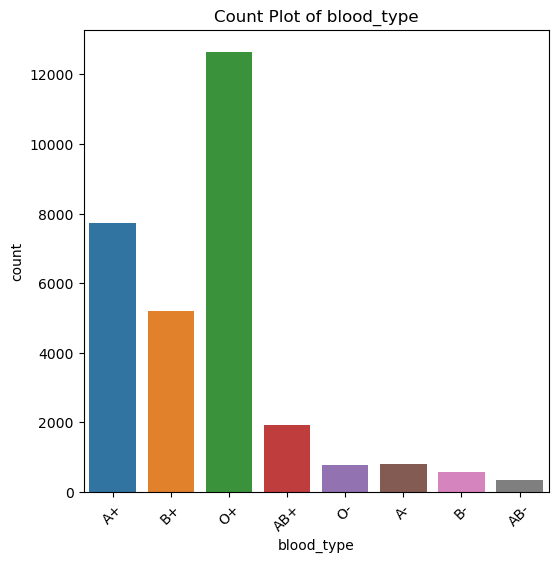

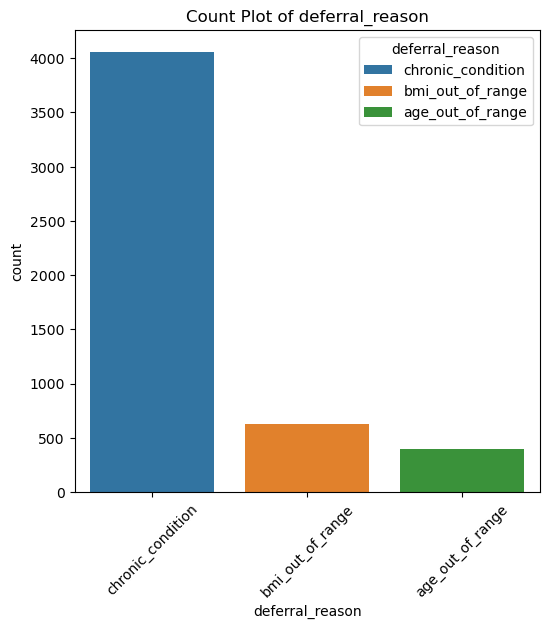

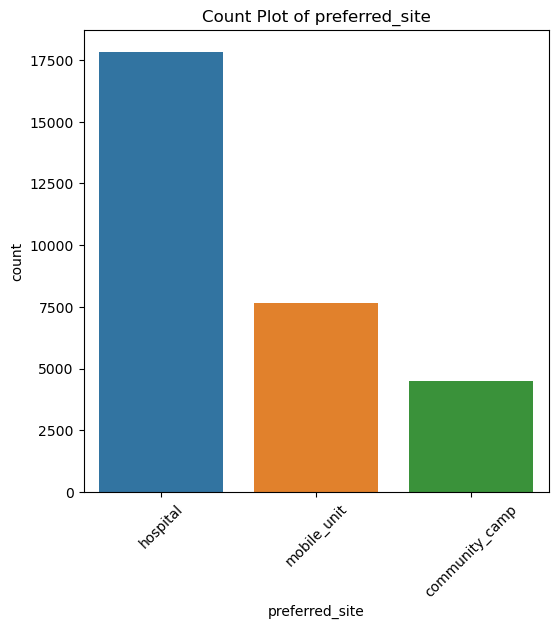

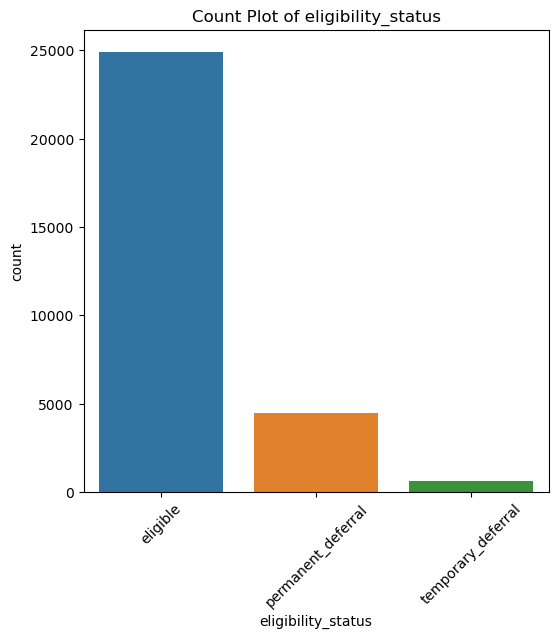

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# select categorical columns
categorical_columns = df.select_dtypes(include=["object"]).columns.tolist()

# loop through categorical columns
for col in categorical_columns:
    plt.figure(figsize=(6,6))
    sns.countplot(data=df, x=col, hue=col)
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotation=45)
    plt.show()

## Most of the blood donations are:
* Gender : Male
* Region : Mena
* Blood_type : O+
* Deferral_Reason : Chronic_condition
* Perferred_site : Hospital
* Eligibility_Status : Eligible

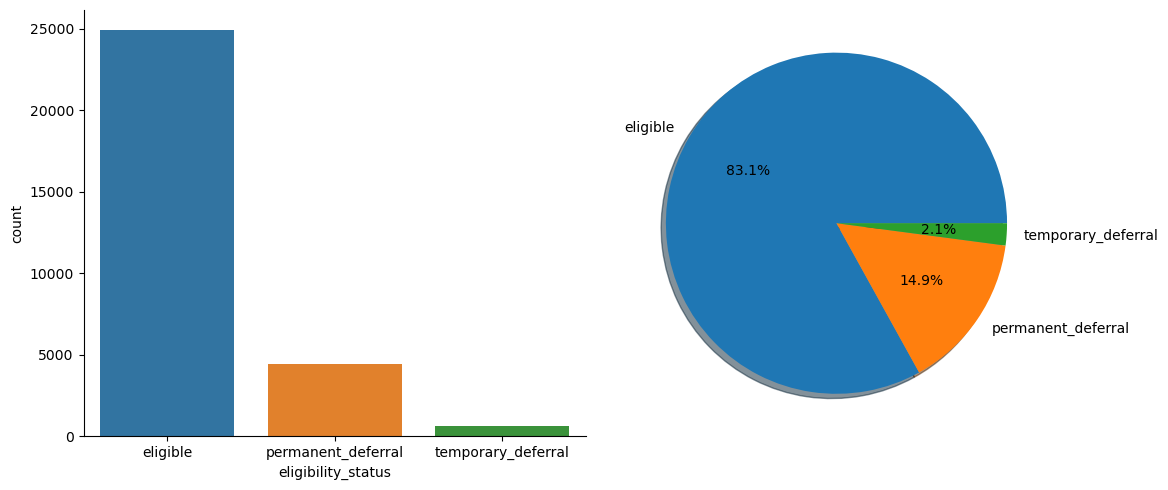

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))

# Bar plot (count of Pass / Fail)
plt.subplot(1,2,1)
sns.countplot(data=df, x="eligibility_status", hue="eligibility_status")
sns.despine()

# Pie chart (composition)
plt.subplot(1,2,2)
df["eligibility_status"].value_counts().plot.pie(
    autopct="%1.1f%%", shadow=True
)
plt.ylabel("")

plt.tight_layout()
plt.show()

>  if we have to see most of eligible to donate blood and it have 83.1%

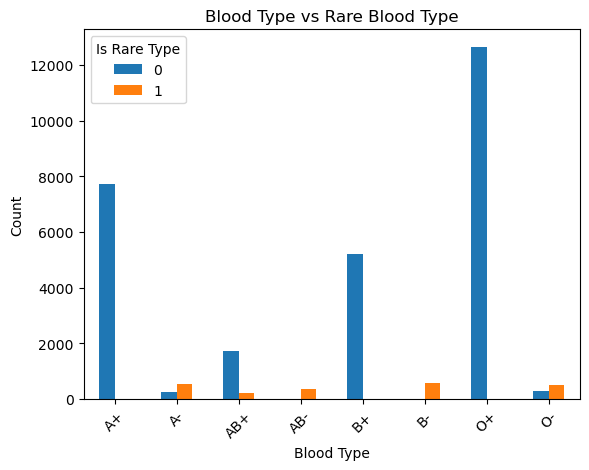

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

# create a crosstab
blood_rare_table = pd.crosstab(df['blood_type'], df['is_rare_type'])

# plot
blood_rare_table.plot(kind='bar')
plt.title('Blood Type vs Rare Blood Type')
plt.xlabel('Blood Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Is Rare Type')
plt.show()


0 indicates non-rare blood types and 1 indicates rare blood types, showing that most common blood groups are not rare while only a few are classified as rare.

### MISSING VALUE ANALYSIS

In [14]:
# To check the it contains any null values

df.isnull().sum()   # we have to see  null values in deferral_reason

age                                  0
sex                                  0
region                               0
blood_type                           0
is_rare_type                         0
smoker                               0
bmi                                  0
chronic_condition_flag               0
eligible_to_donate                   0
deferral_reason                  24915
preferred_site                       0
donation_count_last_12m              0
is_regular_donor                     0
lifetime_donation_count              0
first_donation_year                  0
recency_days                         0
donor_age_at_first_donation          0
blood_type_country_prevalence        0
donation_propensity_score            0
eligibility_status                   0
donated_next_6m                      0
next_6m_donation_count               0
dtype: int64

In [15]:
null_percent = (df.isnull().sum() / len(df)) * 100
null_percent[null_percent > 0].sort_values(ascending=False)


deferral_reason    83.05
dtype: float64

It have 83.05 percentage null values

In [16]:
# drop the columns because it have high null values
df.drop(columns="deferral_reason",inplace=True)




In [17]:
df.isnull().sum()

age                              0
sex                              0
region                           0
blood_type                       0
is_rare_type                     0
smoker                           0
bmi                              0
chronic_condition_flag           0
eligible_to_donate               0
preferred_site                   0
donation_count_last_12m          0
is_regular_donor                 0
lifetime_donation_count          0
first_donation_year              0
recency_days                     0
donor_age_at_first_donation      0
blood_type_country_prevalence    0
donation_propensity_score        0
eligibility_status               0
donated_next_6m                  0
next_6m_donation_count           0
dtype: int64

In [18]:
df.duplicated().sum()

0

# feature distribution

In [19]:
# df['total_donations'] = (df['donation_count_last_12m'] + df['lifetime_donation_count'])
df['health_risk_score'] = (df['smoker'] + df['chronic_condition_flag'])
df['donor_age_gap'] = (df['age'] - df['donor_age_at_first_donation'])

df.drop(['donor_age_at_first_donation'], axis=1, inplace=True)
df.drop(['smoker', 'chronic_condition_flag'], axis=1, inplace=True)
# df.drop(['donation_count_last_12m', 'lifetime_donation_count'], axis=1, inplace=True)
df.drop(["donation_count_last_12m"],axis=1,inplace=True)


In [20]:
# To check the target column value count

df["donated_next_6m"].value_counts()

donated_next_6m
0    18866
1    11134
Name: count, dtype: int64

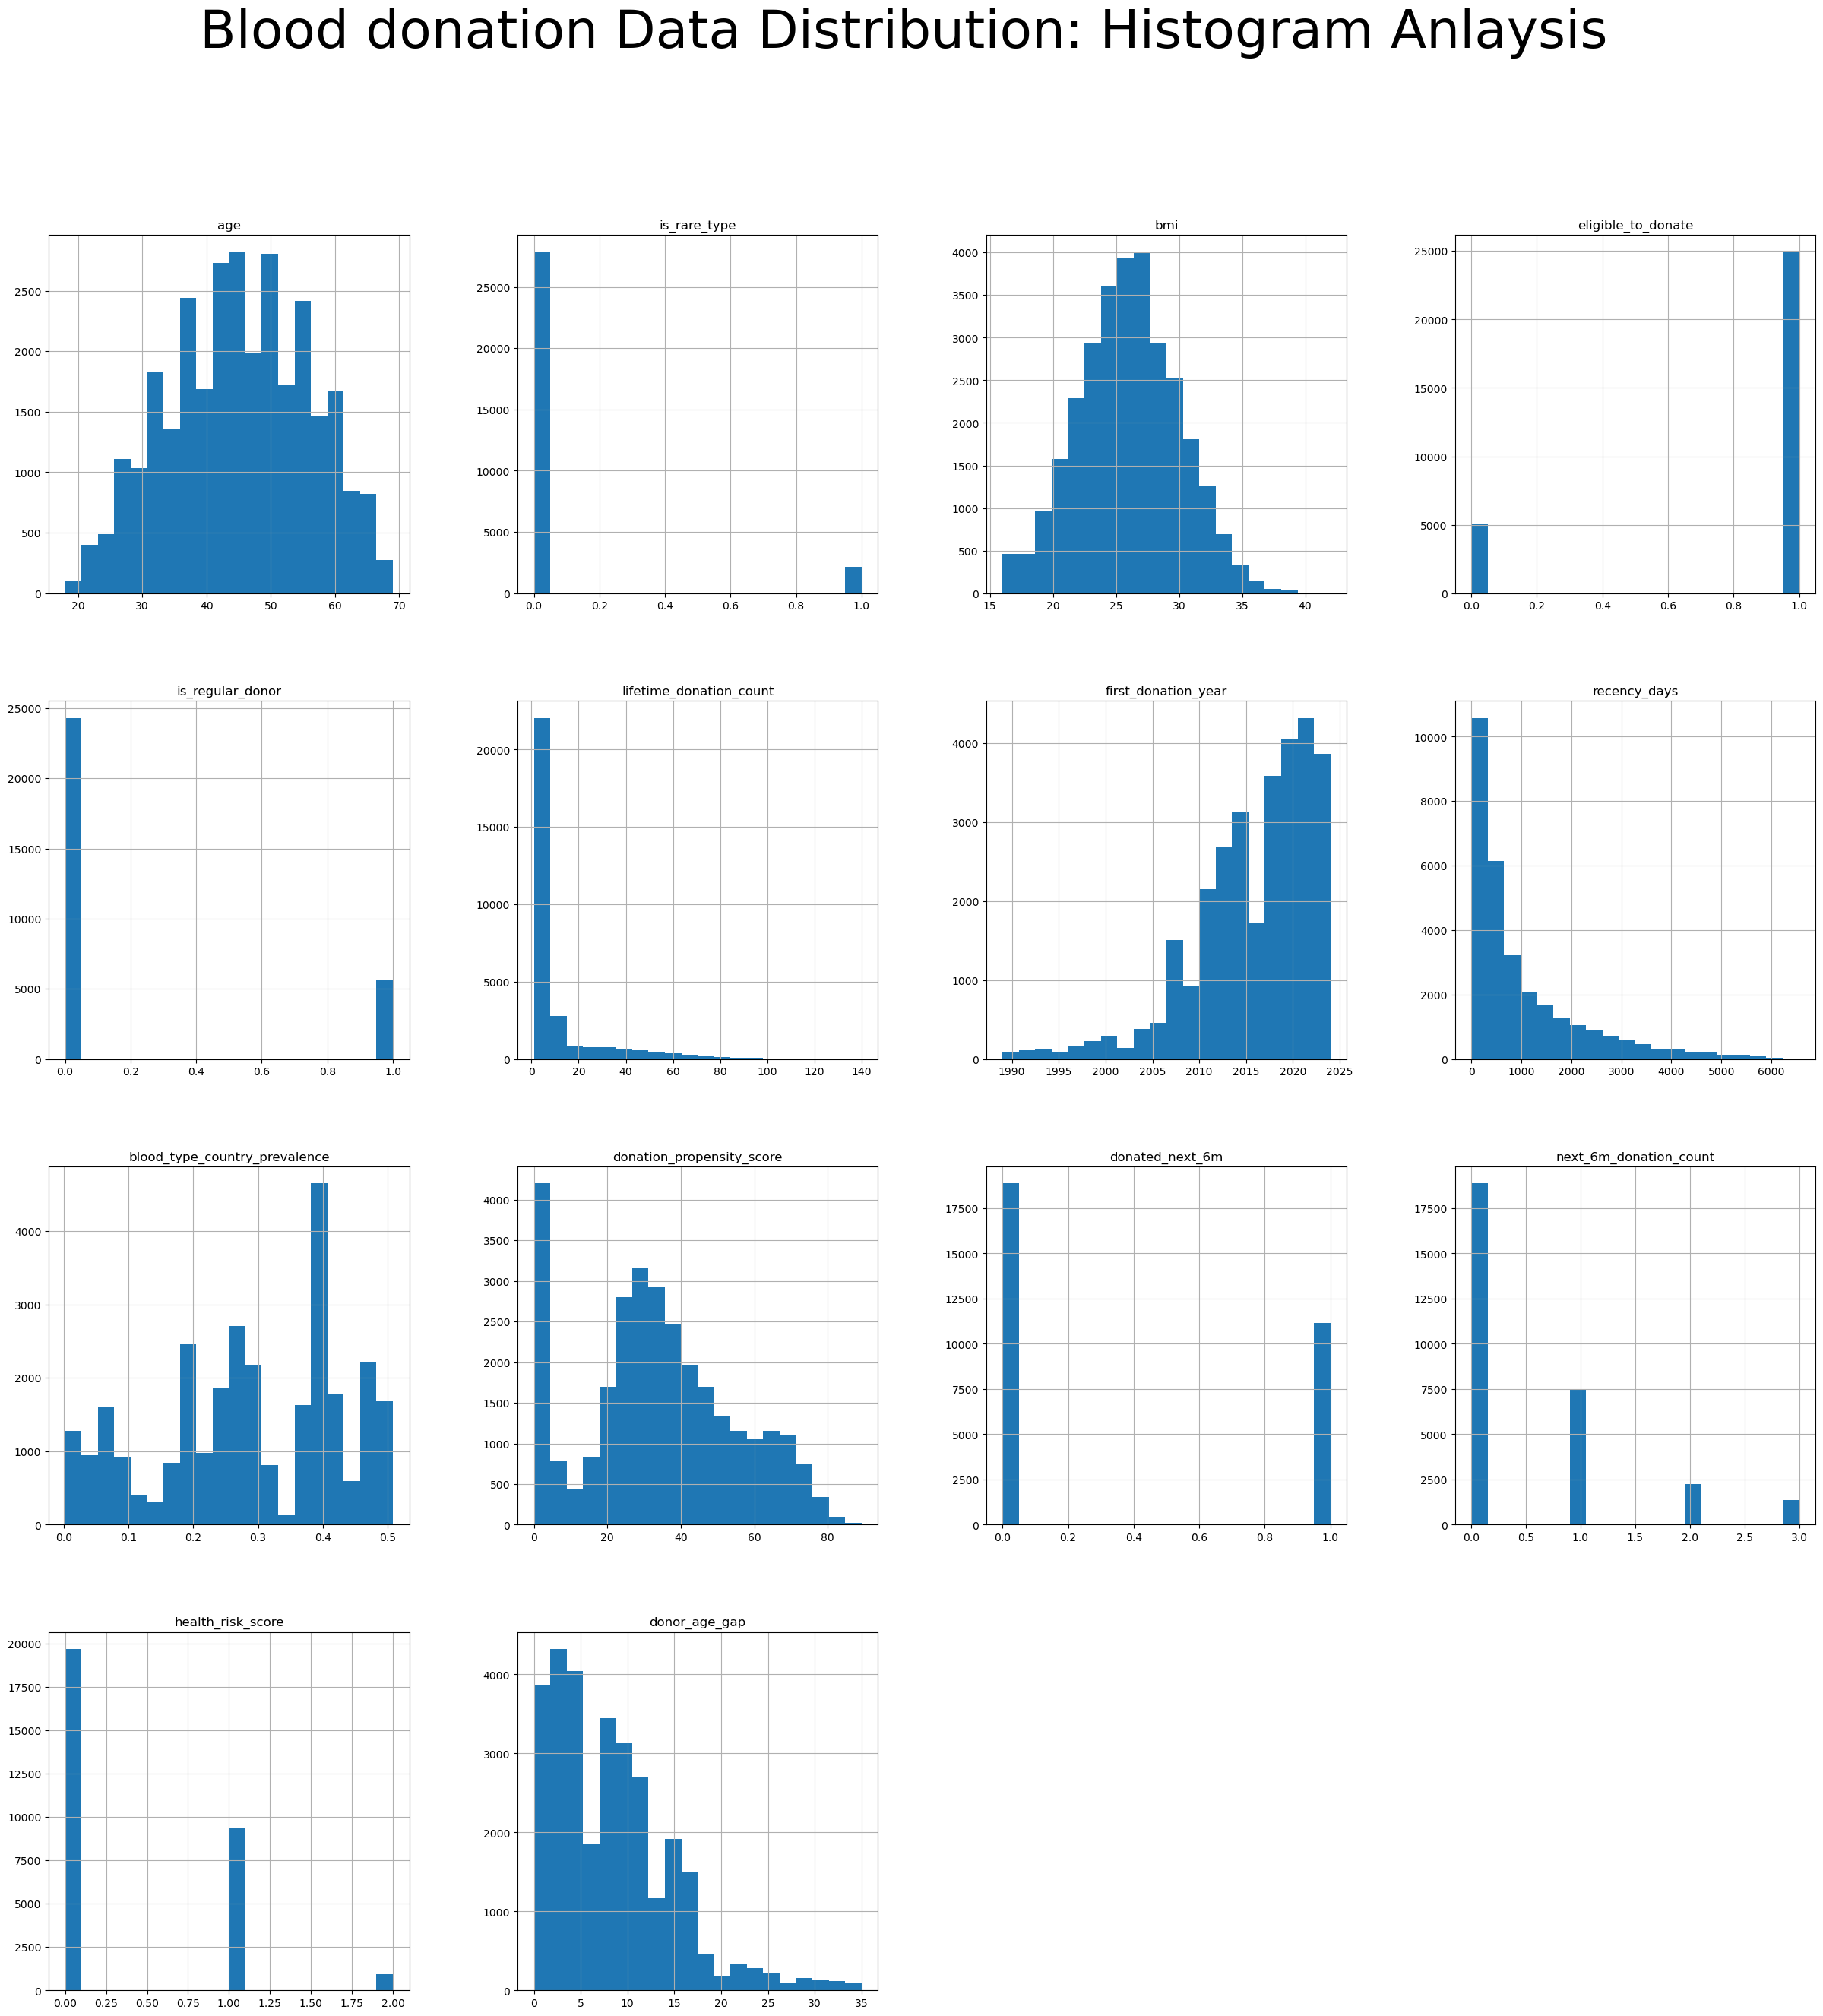

In [21]:

df.hist(bins=20,figsize=(30,30))
plt.suptitle("Blood donation Data Distribution: Histogram Anlaysis",fontsize=50)
plt.show()

In [22]:
df.drop(columns="first_donation_year",inplace=True)
df.drop(columns="lifetime_donation_count",inplace=True)

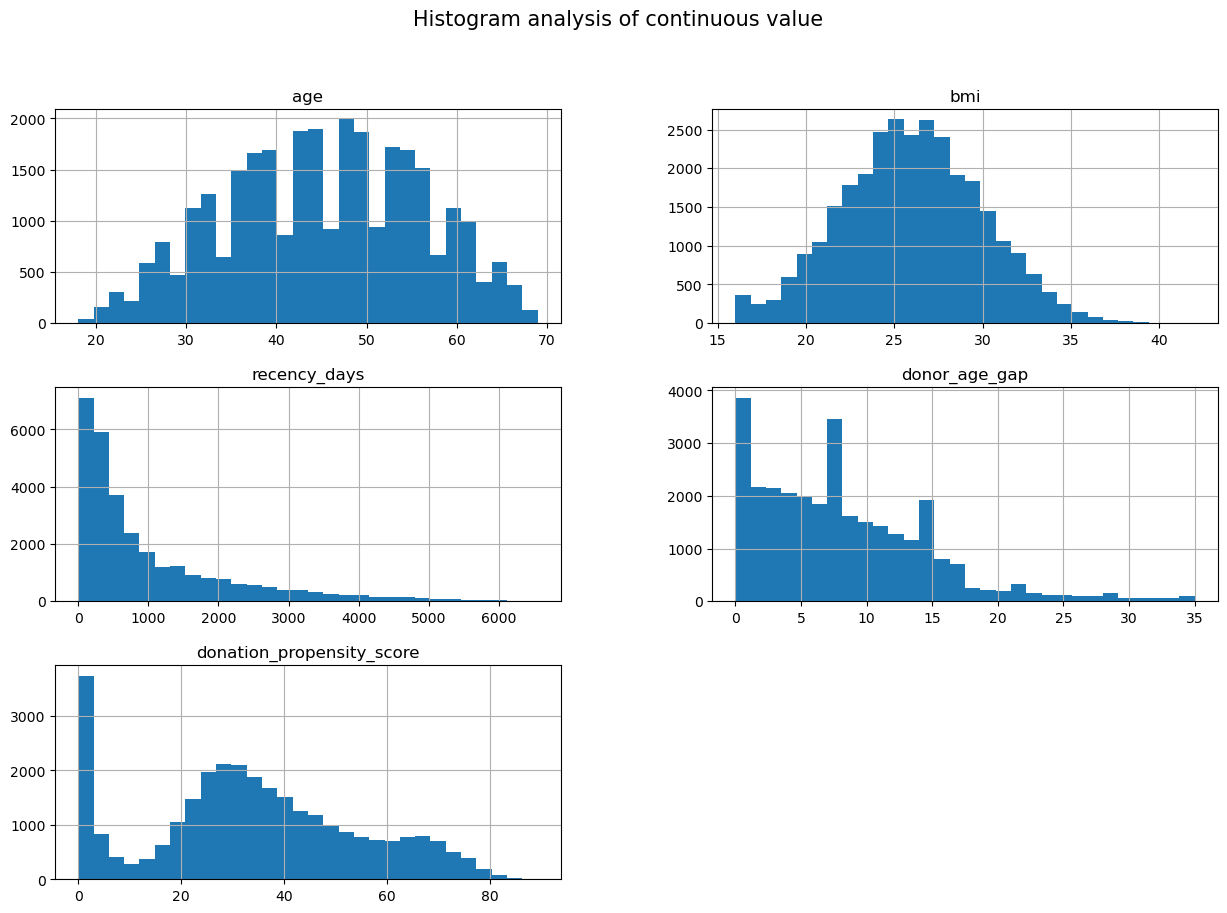

In [23]:
continuous_df=["age","bmi","recency_days","donor_age_gap","donation_propensity_score"]
df[continuous_df].hist(bins=30,figsize=(15,10))
plt.suptitle("Histogram analysis of continuous value",fontsize=(15))
plt.show()

# skewness

In [24]:
# df[continuous_df].skew()

In [25]:
df.skew(numeric_only=True).sort_values(ascending=True)

eligible_to_donate              -1.761848
blood_type_country_prevalence   -0.343618
age                             -0.085850
bmi                              0.042145
donation_propensity_score        0.115467
donated_next_6m                  0.533517
health_risk_score                1.083215
donor_age_gap                    1.214381
next_6m_donation_count           1.529691
is_regular_donor                 1.584646
recency_days                     1.791829
is_rare_type                     3.312698
dtype: float64

In [26]:
# df["is_rare_type"]=np.log1p(df["is_rare_type"])
# df["is_regular_donor"]=np.log1p(df["is_regular_donor"])
# df["lifetime_donation_count"]=np.log1p(df["lifetime_donation_count"])
df["recency_days"]=np.log1p(df["recency_days"])
# df["next_6m_donation_count"]=np.log1p(df["next_6m_donation_count"])
df["health_risk_score"]=np.log1p(df["health_risk_score"])
df["donor_age_gap"]=np.log1p(df["donor_age_gap"])

In [27]:
# df[continuous_df].skew()

In [28]:
df.skew(numeric_only=True).sort_values(ascending=True)

eligible_to_donate              -1.761848
recency_days                    -0.636139
blood_type_country_prevalence   -0.343618
donor_age_gap                   -0.267940
age                             -0.085850
bmi                              0.042145
donation_propensity_score        0.115467
donated_next_6m                  0.533517
health_risk_score                0.804680
next_6m_donation_count           1.529691
is_regular_donor                 1.584646
is_rare_type                     3.312698
dtype: float64

# Boxplot

In [29]:
continuous_df

['age', 'bmi', 'recency_days', 'donor_age_gap', 'donation_propensity_score']

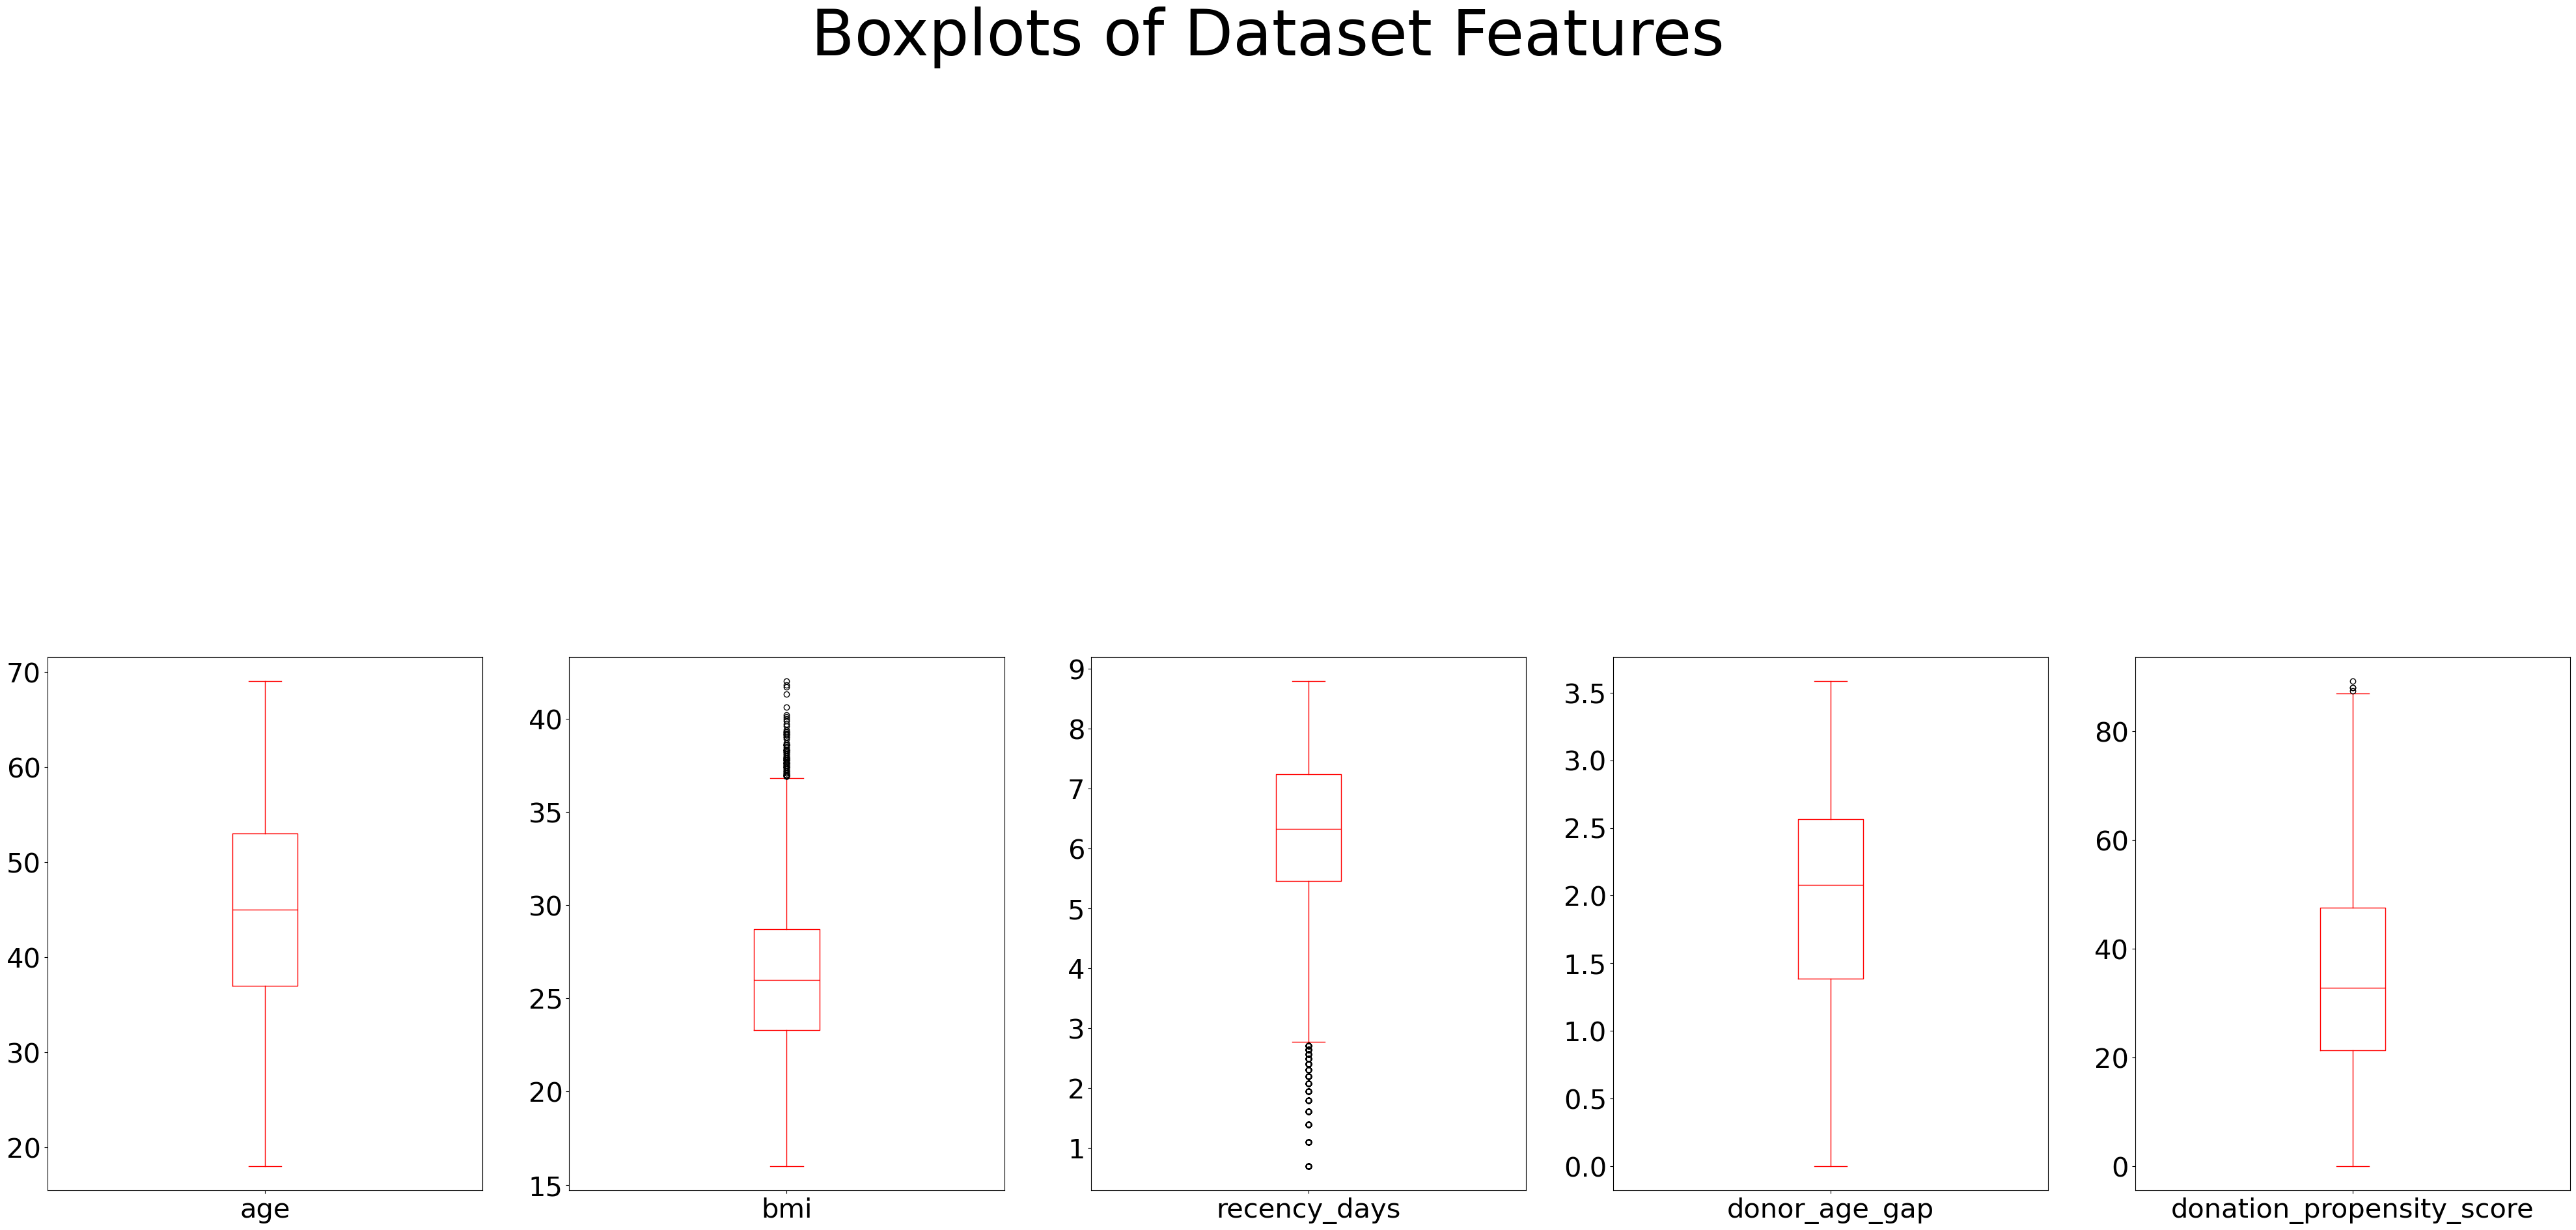

In [30]:
df[continuous_df].plot(kind="box",subplots=True,layout=(8,5),figsize=(50,100),color="red",fontsize=30)
plt.suptitle("Boxplots of Dataset Features",fontsize=70)
plt.show()

# Checking Outliers 

In [31]:
num_cols = [
    'bmi',
    'recency_days',
    'donation_propensity_score'
]

outlier_summary = {}

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    count = df[(df[col] < lower) | (df[col] > upper)].shape[0]
    outlier_summary[col] = count

outlier_summary


{'bmi': 90, 'recency_days': 450, 'donation_propensity_score': 4}

BEFORE CAPPING
count    30000.000000
mean        25.971250
std          3.983766
min         16.000000
25%         23.300000
50%         26.000000
75%         28.700000
max         42.000000
Name: bmi, dtype: float64

Capping limits
Lower: 16.6
Upper: 35.2

AFTER CAPPING
count    30000.000000
mean        25.962267
std          3.935111
min         16.600000
25%         23.300000
50%         26.000000
75%         28.700000
max         35.200000
Name: bmi, dtype: float64

Outliers after capping: 0


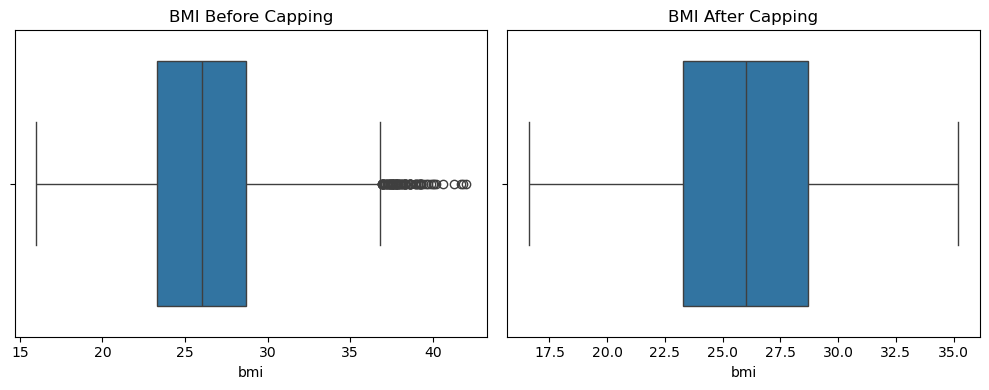

In [32]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# 1. Save BEFORE stats 
# -------------------------------
bmi_before = df['bmi'].copy()

print("BEFORE CAPPING")
print(bmi_before.describe())

# 2. Calculate percentile limits
# -------------------------------
lower = df['bmi'].quantile(0.01)   # bottom 1%
upper = df['bmi'].quantile(0.99)   # top 1%

print("\nCapping limits")
print("Lower:", lower)
print("Upper:", upper)


# 3. Apply CAPPING
# -------------------------------
df['bmi'] = df['bmi'].apply(
    lambda x: lower if x < lower else upper if x > upper else x
)

# 4. AFTER stats
# -------------------------------
print("\nAFTER CAPPING")
print(df['bmi'].describe())


# 5. Outliers check AFTER capping
# -------------------------------
outliers_after = ((df['bmi'] < lower) | (df['bmi'] > upper)).sum()
print("\nOutliers after capping:", outliers_after)

# 6. Boxplot comparison
# -------------------------------
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.boxplot(x=bmi_before)
plt.title("BMI Before Capping")

plt.subplot(1,2,2)
sns.boxplot(x=df['bmi'])
plt.title("BMI After Capping")

plt.tight_layout()
plt.show()


* “BMI had extreme outliers. After applying capping, their influence was controlled, but no data was lost.”
* We reduced the influence of extreme values without deleting any records.

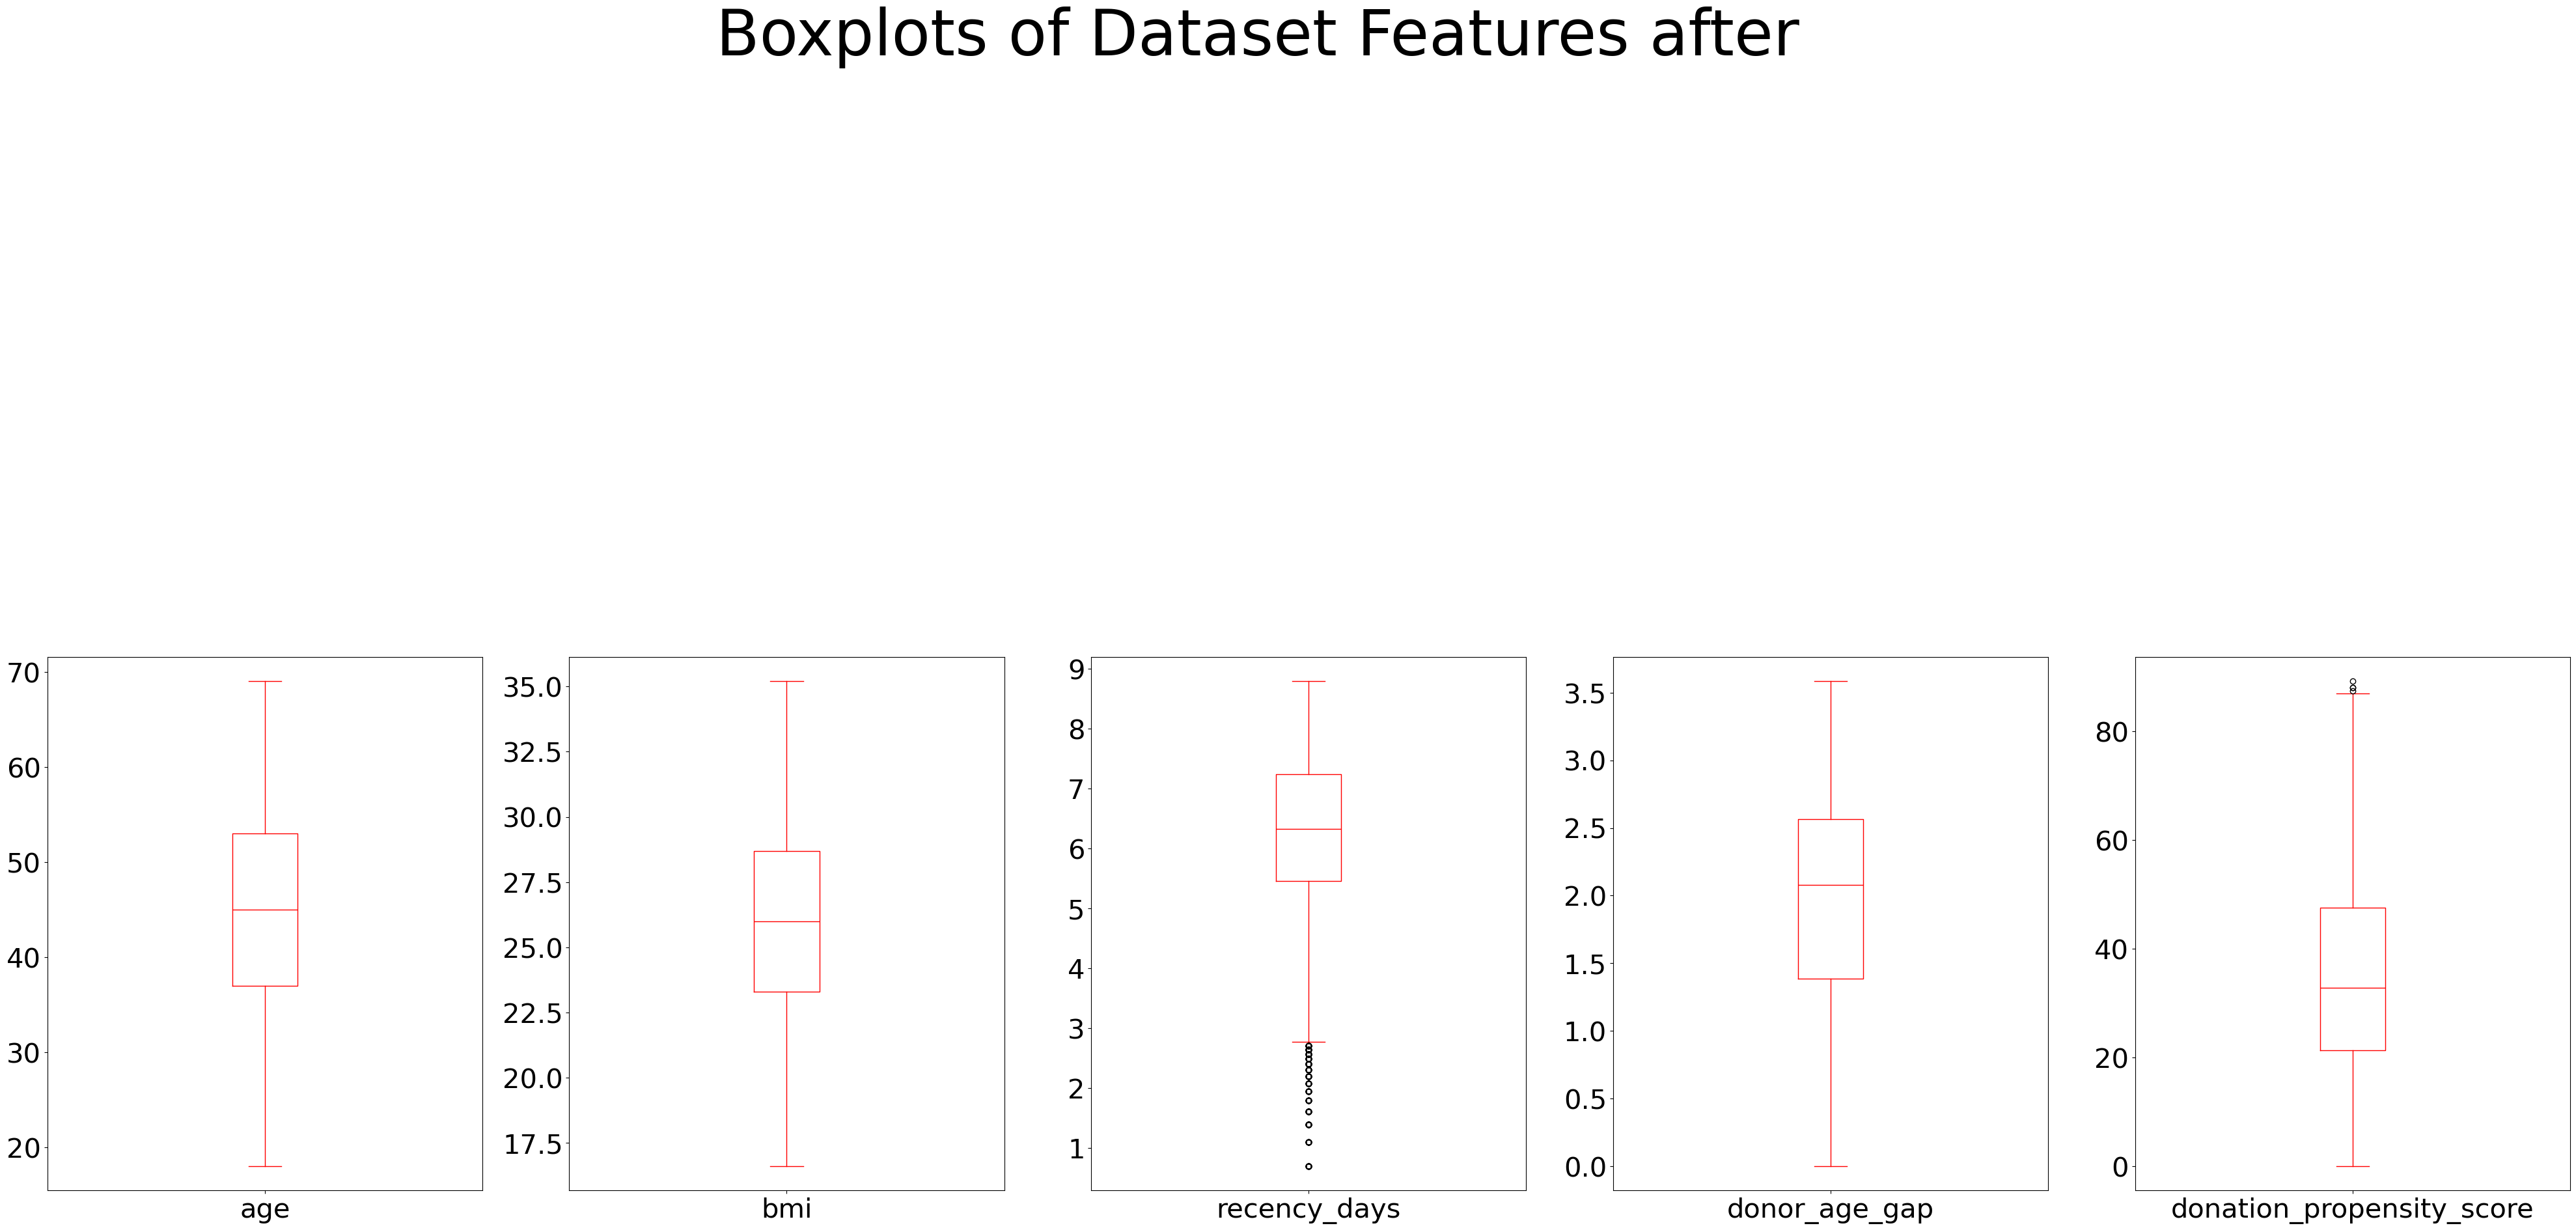

In [33]:
df[continuous_df].plot(kind="box",subplots=True,layout=(8,5),figsize=(50,100),color="red",fontsize=30)
plt.suptitle("Boxplots of Dataset Features after ",fontsize=70)
plt.show()

# Correlation Analysis 

Removing Unwanted Features

In [34]:
# chi square test

import pandas as pd
from scipy.stats import chi2_contingency

# Load dataset


# Create contingency table
contingency = pd.crosstab(
    df['eligibility_status'],
    df['eligible_to_donate']
)

# Apply Chi-Square test
chi2, p_value, dof, expected = chi2_contingency(contingency)

print("Chi-square value:", chi2)
print("P-value:", p_value)
print("Degrees of freedom:", dof)



Chi-square value: 30000.0
P-value: 0.0
Degrees of freedom: 2


The chi-square test is used to check whether two categorical variables are related or independent of each other.

In [35]:
table = pd.crosstab(
    df['eligible_to_donate'],
    df['donated_next_6m']
)

chi2, p, dof, expected = chi2_contingency(table)

print("Chi-square:", chi2)
print("P-value:", p)


Chi-square: 3611.5410209265224
P-value: 0.0


In [36]:
table = pd.crosstab(
    df['eligibility_status'],
    df['donated_next_6m']
)

chi2, p, dof, expected = chi2_contingency(table)

print("Chi-square:", chi2)
print("P-value:", p)


Chi-square: 3613.455471916293
P-value: 0.0


In [37]:
df.drop(columns="eligibility_status",inplace=True)

* eligibility_status should be removed because it contains the same information as eligible_to_donate.
* A p-value of 0.0 means eligibility_status and eligible_to_donate are strongly correlated

In [38]:
df

,age,sex,region,blood_type,is_rare_type,bmi,eligible_to_donate,preferred_site,is_regular_donor,recency_days,blood_type_country_prevalence,donation_propensity_score,donated_next_6m,next_6m_donation_count,health_risk_score,donor_age_gap
0,55,F,Americas,A+,0,27.2,1,hospital,0,6.456770,0.232140,19.4,0,0,0.693147,0.693147
1,47,F,Asia,B+,0,16.6,0,hospital,0,6.896694,0.214937,2.8,0,0,0.693147,2.484907
2,49,F,Africa,O+,0,21.8,1,hospital,0,7.134891,0.461575,27.5,1,1,0.000000,2.397895
3,45,F,Asia,O+,0,29.0,1,hospital,0,5.857933,0.386886,36.1,0,0,0.693147,1.945910
4,52,F,MENA,A+,0,25.0,0,mobile_unit,0,7.118826,0.260613,2.8,0,0,1.098612,2.079442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,44,F,MENA,A-,1,22.8,1,hospital,0,6.810142,0.030138,25.8,0,0,0.000000,1.791759
29996,31,M,Europe,A+,0,24.8,1,hospital,0,3.496508,0.312493,46.6,1,1,0.000000,1.791759
29997,66,F,Africa,B+,0,28.1,0,mobile_unit,0,7.706613,0.181184,6.0,0,0,0.693147,2.397895
29998,39,F,Asia,O+,0,24.1,1,mobile_unit,0,6.077642,0.401338,47.4,1,1,0.000000,1.098612


In [39]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# corr_matrix=df[continuous_df].corr()
# sns.heatmap(corr_matrix,cmap='coolwarm',annot=True)
# # plt.figure(figsize=(10,10))
# plt.title('Correlation Matrix', fontsize=18)
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)
# plt.show()


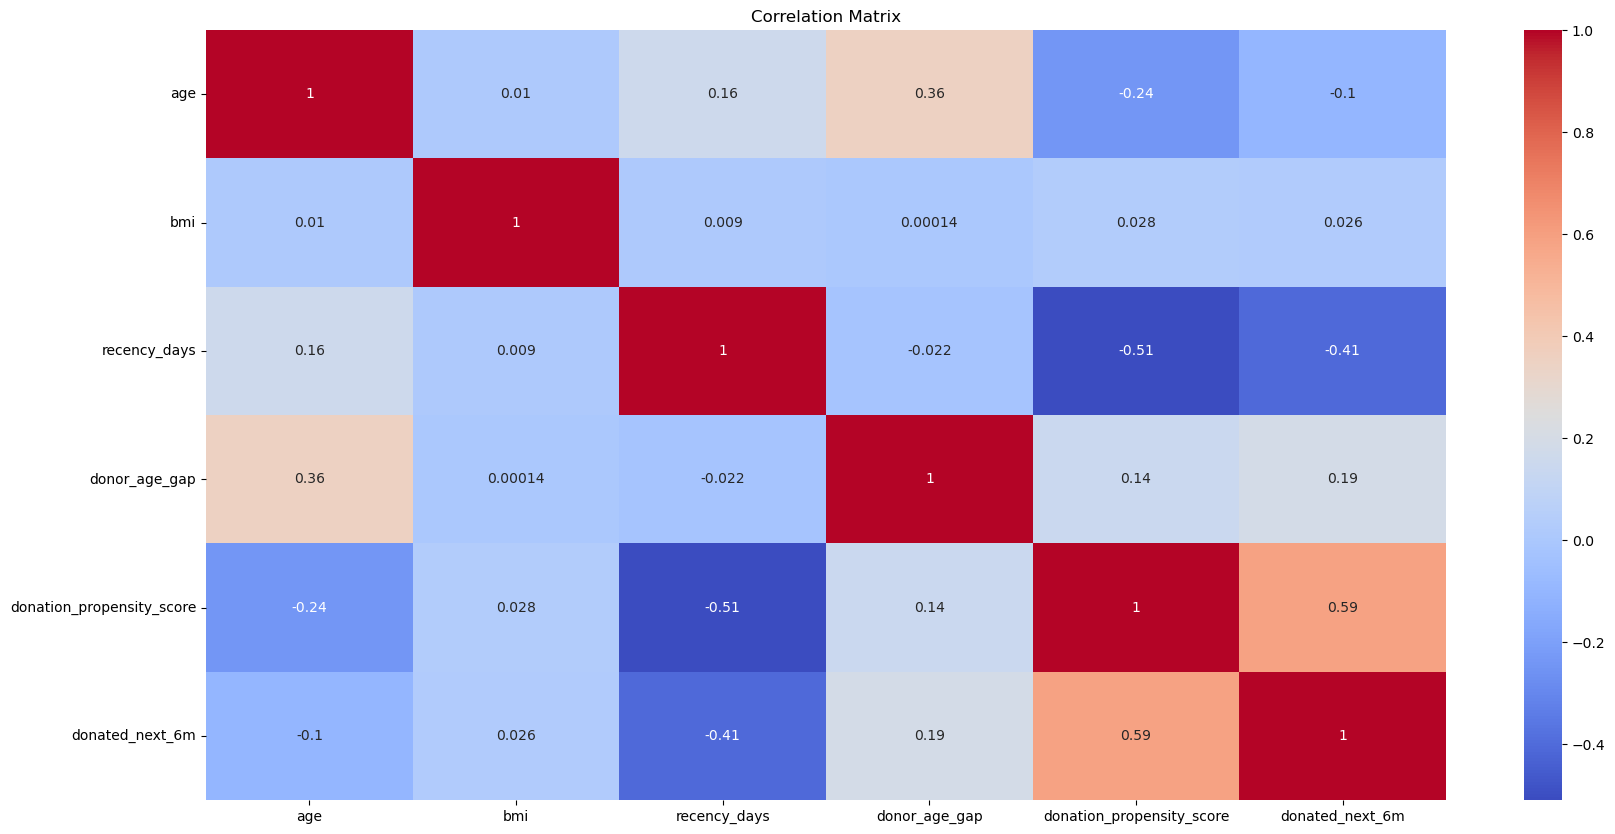

In [40]:
cols = continuous_df + ['donated_next_6m']
corr_matrix = df[cols].corr()

plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix')
plt.show()


Droping highly correlated features

In [41]:
correlation_matrix=df[continuous_df].corr()
threshold=0.5  # set the correlation threshold

# find pairs of faetures with high correlation:

highly_correlated_pairs=[]
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        # check if the absolute correlation exceeds the threshold:

        if abs(correlation_matrix.iloc[i,j])>threshold:
            highly_correlated_pairs.append((correlation_matrix.columns[i],correlation_matrix.columns[j]))

#  print all pairs of highly correlated features:
print(highly_correlated_pairs)


[('donation_propensity_score', 'recency_days')]


In [42]:
drop_cols=["donor_age_gap","donation_propensity_score"]
df.drop(columns=drop_cols,inplace=True)

# Encoding

In [43]:
df["sex"].unique()

array(['F', 'M'], dtype=object)

In [44]:
df["region"].unique()

array(['Americas', 'Asia', 'Africa', 'MENA', 'Europe'], dtype=object)

In [45]:
df["preferred_site"].unique()

array(['hospital', 'mobile_unit', 'community_camp'], dtype=object)

In [46]:
df["sex"]=df["sex"].map({"F":0,"M":1})

In [47]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['region'] = le.fit_transform(df['region'])
df['preferred_site'] = le.fit_transform(df['preferred_site'])
# df['blood_type'] = le.fit_transform(df['blood_type'])


In [48]:

df=pd.get_dummies(df,columns=["blood_type"],drop_first=True)

i used one_hot encoding for blood type.
* because this categories have no natural order.


# Feature Importance

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

X = df.drop(columns=['donated_next_6m'])
y = df['donated_next_6m']
X=df

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lr = LogisticRegression(max_iter=1000)
lr.fit(X_scaled, y)

importance = pd.Series(
    lr.coef_[0],
    index=X.columns
).sort_values(key=np.abs, ascending=False)

importance


donated_next_6m                  5.666306
next_6m_donation_count           3.513673
eligible_to_donate               0.416794
recency_days                    -0.265631
is_regular_donor                 0.208607
health_risk_score               -0.102092
blood_type_B-                    0.013614
blood_type_A-                   -0.011550
blood_type_country_prevalence    0.011396
blood_type_B+                   -0.010212
age                              0.008281
sex                             -0.006243
preferred_site                   0.005200
blood_type_AB-                   0.004626
region                          -0.003109
blood_type_O-                    0.003074
blood_type_O+                   -0.003041
bmi                             -0.003019
blood_type_AB+                   0.002947
is_rare_type                    -0.002340
dtype: float64

# Model Building

In [50]:
X = df.drop(columns=[
    'donated_next_6m',        # target
    'next_6m_donation_count'  # future info → leakage
])
y = df['donated_next_6m']


In [51]:
X

,age,sex,region,is_rare_type,bmi,eligible_to_donate,preferred_site,is_regular_donor,recency_days,blood_type_country_prevalence,health_risk_score,blood_type_A-,blood_type_AB+,blood_type_AB-,blood_type_B+,blood_type_B-,blood_type_O+,blood_type_O-
0,55,0,1,0,27.2,1,1,0,6.456770,0.232140,0.693147,False,False,False,False,False,False,False
1,47,0,2,0,16.6,0,1,0,6.896694,0.214937,0.693147,False,False,False,True,False,False,False
2,49,0,0,0,21.8,1,1,0,7.134891,0.461575,0.000000,False,False,False,False,False,True,False
3,45,0,2,0,29.0,1,1,0,5.857933,0.386886,0.693147,False,False,False,False,False,True,False
4,52,0,4,0,25.0,0,2,0,7.118826,0.260613,1.098612,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,44,0,4,1,22.8,1,1,0,6.810142,0.030138,0.000000,True,False,False,False,False,False,False
29996,31,1,3,0,24.8,1,1,0,3.496508,0.312493,0.000000,False,False,False,False,False,False,False
29997,66,0,0,0,28.1,0,2,0,7.706613,0.181184,0.693147,False,False,False,True,False,False,False
29998,39,0,2,0,24.1,1,2,0,6.077642,0.401338,0.000000,False,False,False,False,False,True,False


In [52]:
y

0        0
1        0
2        1
3        0
4        0
        ..
29995    0
29996    1
29997    0
29998    1
29999    1
Name: donated_next_6m, Length: 30000, dtype: int64

In [53]:
# x = df[continuous_df].drop(columns='donated_next_6m')
# y = df['donated_next_6m']


In [54]:
x_train, x_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42,stratify=y)


stratify=y keeps the same class proportion in both train and test sets
which is important for imbalanced data

In [55]:
# y = df['donated_next_6m']
df["donated_next_6m"].value_counts()

donated_next_6m
0    18866
1    11134
Name: count, dtype: int64

In [56]:
conut=df['donated_next_6m'].value_counts(normalize=True) * 100
conut.round(2)


donated_next_6m
0    62.89
1    37.11
Name: proportion, dtype: float64

The target variable is imbalanced, with about 63% non-donors and 37% donors in the next 6 months.”

In [57]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [58]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=42)
x_train_smote,y_train_smote=sm.fit_resample(x_train_scaled,y_train)

In [59]:
y_train_smote.value_counts()

donated_next_6m
1    15093
0    15093
Name: count, dtype: int64

In [60]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(x_train_smote, y_train_smote)

LogisticRegression(max_iter=1000)

In [61]:
y_pred = model.predict(x_test_scaled)

In [62]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("f1_score:", f1_score(y_test, y_pred))
print("recall_score:", recall_score(y_test, y_pred))
print("precision_score:", precision_score(y_test, y_pred))


Accuracy: 0.7926666666666666
f1_score: 0.7262323943661971
recall_score: 0.740907049842838
precision_score: 0.7121277514026759


In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


class_model = {
    "logistic": LogisticRegression(max_iter=500),
    "randomforestclassifier": RandomForestClassifier(),
    "decisiontree": DecisionTreeClassifier(),
    "knn": KNeighborsClassifier(n_neighbors=11),
    "svm": SVC(kernel="linear"),
    "gradientboosting": GradientBoostingClassifier(random_state=0, learning_rate=0.45),
    
}


results = {
    "model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-score": []
}

for model_name, model in class_model.items():
    # Train
    model.fit(x_train, y_train)

    # Predict
    y_pred = model.predict(x_test)



    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store results
    results["model"].append(model_name)
    results["Accuracy"].append(acc)
    results["Precision"].append(prec)
    results["Recall"].append(rec)
    results["F1-score"].append(f1)

    # print(f"\nModel: {model_name}")
    # print("Confusion Matrix:")
    # print(cm)

results_df = pd.DataFrame(results)

# Sort by best F1-score
results_df = results_df.sort_values(by="F1-score", ascending=False)

results_df.style.background_gradient(cmap="Blues")


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,model,Accuracy,Precision,Recall,F1-score
5,gradientboosting,0.819167,0.791624,0.696004,0.740741
1,randomforestclassifier,0.810167,0.791221,0.663673,0.721856
0,logistic,0.810833,0.842105,0.603502,0.703113
4,svm,0.797000,0.896932,0.511899,0.651801
3,knn,0.762167,0.724215,0.580153,0.644228
2,decisiontree,0.722000,0.621999,0.639874,0.630810


In [64]:
from sklearn.model_selection import GridSearchCV

param_grids = {
    "logistic": {
        "C": [0.01, 0.1, 1, 10],
        "solver": ["liblinear"]
    },

    "randomforestclassifier": {
        "n_estimators": [100, 200],
        "max_depth": [None, 10],
        "min_samples_split": [2, 5]
    },

    "decisiontree": {
        "max_depth": [None, 5, 10],
        "min_samples_split": [2, 5]
    },

    "knn": {
        "n_neighbors": [3, 5, 7, 11],
        "weights": ["uniform", "distance"]
    },

    "svm": {
        "C": [0.1, 1, 10],
        "kernel": ["linear", "rbf"]
    },

    "gradientboosting": {
        "n_estimators": [100, 200],
        "learning_rate": [0.01, 0.1],
        "max_depth": [3, 4]
    }
}




tuned_results = []

for name, model in class_model.items():

    grid = GridSearchCV(
        estimator=model,
        param_grid=param_grids[name],  # ✅ now exists
        scoring="f1",
        cv=5,
        n_jobs=-1
    )

    if name in ["logistic", "svm", "knn"]:
        grid.fit(x_train_scaled, y_train)
        y_pred = grid.predict(x_test_scaled)
    else:
        grid.fit(x_train, y_train)
        y_pred = grid.predict(x_test)

    tuned_results.append({
        "Model": name,
        "Best Params": grid.best_params_,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-score": f1_score(y_test, y_pred)
    })




In [65]:
tuned_df = pd.DataFrame(tuned_results)
tuned_df = tuned_df.sort_values(by="F1-score", ascending=False)
tuned_df.style.background_gradient(cmap="Greens")


,Model,Best Params,Accuracy,Precision,Recall,F1-score
2,decisiontree,"{'max_depth': 5, 'min_samples_split': 2}",0.823667,0.792104,0.711720,0.749763
5,gradientboosting,"{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}",0.823667,0.792104,0.711720,0.749763
1,randomforestclassifier,"{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}",0.823667,0.795351,0.706780,0.748455
0,logistic,"{'C': 0.1, 'solver': 'liblinear'}",0.812333,0.844278,0.606197,0.705698
4,svm,"{'C': 10, 'kernel': 'rbf'}",0.804333,0.849370,0.574764,0.685592
3,knn,"{'n_neighbors': 11, 'weights': 'distance'}",0.791167,0.789536,0.596318,0.679458


In [66]:
# def perform_hypothesis_test(
#     stat,
#     p_value,
#     alpha=0.05,
#     null_hypothesis="",
#     alternative_hypothesis=""
# ):
#     """
#     Perform hypothesis testing using p-value decision rule.

#     Parameters:
#     - stat: test statistic value
#     - p_value: p-value obtained from the test
#     - alpha: significance level (default = 0.05)
#     - null_hypothesis: description of null hypothesis
#     - alternative_hypothesis: description of alternative hypothesis

#     Returns:
#     - Dictionary containing test result and decision
#     """

#     if p_value < alpha:
#         decision = f"Reject the null hypothesis. {alternative_hypothesis}"
#     else:
#         decision = f"Fail to reject the null hypothesis. {null_hypothesis}"

#     return {
#         "test_statistic": stat,
#         "p_value": p_value,
#         "alpha": alpha,
#         "null_hypothesis": null_hypothesis,
#         "alternative_hypothesis": alternative_hypothesis,
#         "decision": decision
#     }


In [67]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score
from scipy.stats import ttest_rel

# Number of iterations
n_iterations = 20

f1_dt = []
f1_gb = []

for i in range(n_iterations):

    # -------- Decision Tree --------
    dt_model = DecisionTreeClassifier(
        max_depth=5,
        min_samples_split=2,
        random_state=i
    )
    dt_model.fit(x_train, y_train)
    y_pred_dt = dt_model.predict(x_test)
    f1_dt.append(f1_score(y_test, y_pred_dt))

    # -------- Gradient Boosting --------
    gb_model = GradientBoostingClassifier(
        learning_rate=0.01,
        max_depth=3,
        n_estimators=200,
        random_state=i
    )
    gb_model.fit(x_train, y_train)
    y_pred_gb = gb_model.predict(x_test)
    f1_gb.append(f1_score(y_test, y_pred_gb))

# Paired T-Test
t_stat, p_value = ttest_rel(f1_dt, f1_gb)

# Hypothesis decision
alpha = 0.05

if p_value < alpha:
    result = "Reject H0 → Performance difference is statistically significant."  # alternative hypothesis
else:
    result = "Fail to Reject H0 → No statistically significant difference." # null hypothesis

print("Decision Tree vs Gradient Boosting")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")
print("Result:", result)


Decision Tree vs Gradient Boosting
T-statistic: nan
P-value: nan
Result: Fail to Reject H0 → No statistically significant difference.


In [68]:
# Mean accuracy
mean_dt = np.mean(f1_dt)
mean_gb = np.mean(f1_gb)

print("Mean Accuracy - Decision Tree:", mean_dt)
print("Mean Accuracy - Gradient Boosting:", mean_gb)

# Comparison
if mean_dt > mean_gb:
    print("Decision Tree model performs better on average.")
elif mean_gb > mean_dt:
    print("Gradient Boosting model performs better on average.")
else:
    print("Both models perform equally on average.")

Mean Accuracy - Decision Tree: 0.749763481551561
Mean Accuracy - Gradient Boosting: 0.749763481551561
Both models perform equally on average.


## Inference


> “Both Decision Tree and Gradient Boosting achieved identical F1 scores across multiple iterations, resulting in zero variance.Therefore, the paired t-test was undefined and no statistically significant difference could be established.”

# pickle File

In [69]:
# save the clssification model:
import pickle
model=GradientBoostingClassifier(random_state=0,learning_rate=0.45)
model.fit(x_train,y_train.values.ravel())
with open("donation_blood_model.pk1","wb") as file:
    pickle.dump(model,file)
print("pickle file saved sucessfully")

pickle file saved sucessfully


## Final Report ##

* This project presents an end-to-end machine learning workflow using real-world blood donation registry data.
* It includes problem definition, data cleaning, missing value handling, IQR-based outlier removal, feature engineering, categorical encoding, and feature scaling.
* Since the target variable eligible_to_donate contains binary values (0/1), the problem was treated as a Binary Classification task.
* Logistic Regression was selected as the final model due to its suitable for healthcare-related classification problems.
* The model was trained using train–test split and evaluated with Accuracy, Precision, Recall, and F1-score to predict donor eligibility.
* After training, the model was saved as a pickle file for deployment to predict donor eligibility in real-world blood bank applications.

In [70]:
import gradio as gr
import pickle
import numpy as np

# -----------------------------
# Load trained model
# -----------------------------
with open("donation_blood_model.pk1", "rb") as file:
    model = pickle.load(file)

# -----------------------------
# EXACT ENCODING MAPS
# (verified from notebook)
# -----------------------------
sex_map = {
    "F": 0,
    "M": 1
}

region_map = {
    "Africa": 0,
    "Americas": 1,
    "Asia": 2,
    "Europe": 3,
    "MENA": 4
}

preferred_site_map = {
    "community_camp": 0,
    "hospital": 1,
    "mobile_unit": 2
}

# -----------------------------
# Prediction function
# -----------------------------
def predict_donation(
    age,
    sex,
    region,
    is_rare_type,
    bmi,
    eligible_to_donate,
    preferred_site,
    is_regular_donor,
    recency_days,
    blood_type_country_prevalence,
    health_risk_score,
    blood_type_A_minus,
    blood_type_AB_plus,
    blood_type_AB_minus,
    blood_type_B_plus,
    blood_type_B_minus,
    blood_type_O_plus,
    blood_type_O_minus
):
    features = np.array([[
        age,
        sex_map[sex],
        region_map[region],
        is_rare_type,
        bmi,
        eligible_to_donate,
        preferred_site_map[preferred_site],
        is_regular_donor,
        recency_days,
        blood_type_country_prevalence,
        health_risk_score,
        blood_type_A_minus,
        blood_type_AB_plus,
        blood_type_AB_minus,
        blood_type_B_plus,
        blood_type_B_minus,
        blood_type_O_plus,
        blood_type_O_minus
    ]])

    prediction = model.predict(features)[0]
    probability = model.predict_proba(features)[0][1]

    return (
        "✅ Will Donate in the Next 6 Months"
        if prediction == 1
        else "❌ Will Not Donate in the Next 6 Months"
    ) + f" (Probability: {probability:.2f})"

# -----------------------------
# Gradio Interface
# -----------------------------
interface = gr.Interface(
    fn=predict_donation,
    inputs=[
        gr.Number(label="Age"),
        gr.Dropdown(["F", "M"], label="Sex"),
        gr.Dropdown(
            ["Africa", "Americas", "Asia", "Europe", "MENA"],
            label="Region"
        ),
        gr.Radio([0, 1], label="Rare Blood Type (0 = No, 1 = Yes)"),
        gr.Number(label="Body Mass Index (BMI)"),
        gr.Radio([0, 1], label="Eligible to Donate (0 = No, 1 = Yes)"),
        gr.Dropdown(
            ["community_camp", "hospital", "mobile_unit"],
            label="Preferred Donation Site"
        ),
        gr.Radio([0, 1], label="Regular Donor (0 = No, 1 = Yes)"),
        gr.Number(label="Days Since Last Donation"),
        gr.Number(label="Blood Type Country Prevalence"),
        gr.Number(label="Health Risk Score"),
        gr.Radio([0, 1], label="Blood Type A−"),
        gr.Radio([0, 1], label="Blood Type AB+"),
        gr.Radio([0, 1], label="Blood Type AB−"),
        gr.Radio([0, 1], label="Blood Type B+"),
        gr.Radio([0, 1], label="Blood Type B−"),
        gr.Radio([0, 1], label="Blood Type O+"),
        gr.Radio([0, 1], label="Blood Type O−")
    ],
    outputs=gr.Textbox(label="Prediction Result"),
    title="🩸 Blood Donation Prediction System",
    description="Predict whether a donor will donate blood in the next 6 months using health, history, and demographic features."
)

# -----------------------------
# Launch App
# -----------------------------
interface.launch()


* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
